In [29]:
from astroquery.simbad import Simbad
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)
import seaborn as sns; sns.set()
%matplotlib inline

#https://physics.nist.gov/PhysRefData/Handbook/Tables/calciumtable2.htm

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


[False  True False  True  True False  True  True  True False  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True False False]
[-5.75400019 -5.9380002  -5.69099998 -5.57399988 -5.77600002 -5.49599981
 -5.52299976 -5.48000002 -5.61299992 -5.45699978 -5.296      -5.25600004
 -5.91499996 -5.17799997 -5.18200016 -4.88500023 -5.04400015 -4.91099977
 -4.85699987 -4.84299994 -4.59899998 -4.75199986 -4.73799992 -4.42799997]
[-5.94824033 -5.77068585 -5.69834404 -5.64679481 -5.64545355 -5.63132889
 -5.6223707  -5.60609193 -5.60436379 -5.56090516 -5.52084756 -5.44806884
 -5.43945227 -5.43660307 -5.42743053 -5.26896994 -5.25349877 -5.21049019
 -5.19852442 -5.17341294 -5.0159545  -5.01347619 -4.97981591 -4.84216782]
 
1.422 x + 2.444


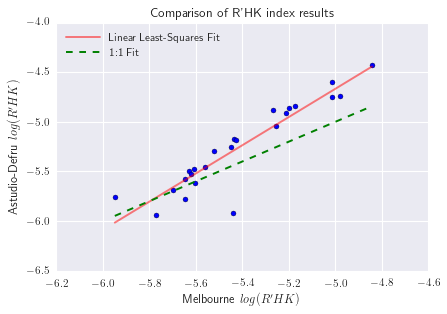

In [30]:
test = ascii.read("short_ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["rhk_prime"]))][:33]

bool_ad_logRHK = np.logical_and(test["ad_logRHK"] != 0.0, test["rhk_prime"] != 0)
print(bool_ad_logRHK)
ad_logRHK = np.array(test["ad_logRHK"])
print(ad_logRHK[bool_ad_logRHK])
print(np.array(np.log10(test["rhk_prime"])[bool_ad_logRHK]))

x = np.log10(test["rhk_prime"])[bool_ad_logRHK]
y = ad_logRHK[bool_ad_logRHK]
p = np.poly1d(np.polyfit(x, y, 1))
print p
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
plt.title("Comparison of R'HK index results")
plt.xlabel("Melbourne $log(R'HK)$")
plt.ylabel("Astudio-Defru $log(R'HK)$")
plt.savefig("Comparisons/compare_logrhk.png")
plt.show()

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


[ True False  True False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True False False False  True False
  True  True  True  True  True False  True False]
['GJ191' 'GJ667C' 'GJ821' 'GJ411' 'GJ832' 'GJ173' 'GJ436' 'GJ581' 'GJ163'
 'GJ699' 'GJ887' 'GJ588' 'GJ273' 'GJ849' 'GJ628' 'GJ4304' 'GJ754.1B'
 'GJ676A' 'GJ876' 'GJ1214' 'GJ3053' 'GJ49' 'GJ176' 'GJ1132' 'GJ3470'
 'GJ674' 'GJ205' 'GJ213' 'GJ1061' 'GJ752B' 'GJ644A' 'GJ410']
[ 0.28600001  0.38299999  0.76499999  0.78500003  0.66799998  0.505
  0.70300001  0.68699998  1.15499997  1.00100005  0.76499999  0.96799999
  0.82099998  0.37200001  1.53900003  0.949       1.59300005  1.56900001
  1.63300002  2.04999995  0.57099998  1.96300006  3.2019999 ]
[ 0.29574813  0.36094988  0.48854663  0.49507168  0.51070829  0.51221573
  0.52257379  0.56052622  0.58042603  0.60472135  0.60739391  0.61717429
  0.61984368  0.656762    0.68646888  0.6881429   0.74077326  0.75453002
  0.77600601  0.84521845  0.87286842

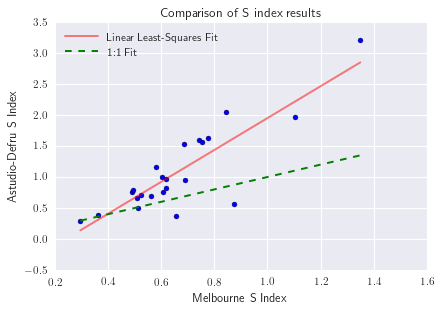

In [31]:
test = ascii.read("short_ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["s"]))][:33]
test = test[np.where(test["ad_S"]<11)]

bool_ad_S = np.logical_and(test["ad_S"] != 0.0, test["s"] != 0)
print(bool_ad_S)
print(np.array(test["star"]))
ad_S = np.array(test["ad_S"])
print(ad_S[bool_ad_S])
print(np.array(test["s"])[bool_ad_S])

x = test["s"][bool_ad_S]
y = ad_S[bool_ad_S]
p = np.poly1d(np.polyfit(x, y, 1))
print p
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
plt.title("Comparison of S index results")
plt.xlabel("Melbourne S Index")
plt.ylabel("Astudio-Defru S Index")
plt.savefig("Comparisons/compare_s.png")
plt.show()

/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


[True False False True False -- False True False False True False -- False
 False False False False False -- False False False False -- -- False -- --
 -- True -- False False False False False False False False False -- False
 False False False -- False False -- --]
['GJ273' 'GJ699' 'GJ176' 'GJ436' 'GJ285']
[ 0.091       0.074       0.26300001  0.23999999 -9.34000015]
[ 0.02765853  0.06506531  0.1570015   0.18128386 -9.42530649]
 
0.9973 x + 0.05964


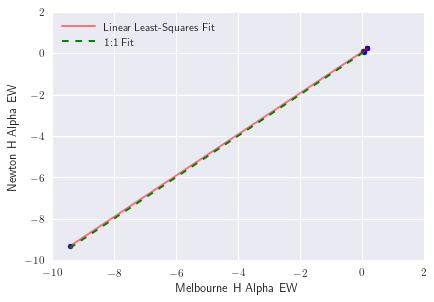

In [48]:
test = ascii.read("short_ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["H_alpha"]))]

bool_newt_Ha = np.logical_and(test["newt_Ha"] != 0.0, test["H_alpha"] != 0)
print(bool_newt_Ha)
print(np.array(test["star"])[bool_newt_Ha])
newt_Ha = np.array(test["newt_Ha"])
print(newt_Ha[bool_newt_Ha])
print(np.array(test["H_alpha"])[bool_newt_Ha])

x = test["H_alpha"][bool_newt_Ha]
y = newt_Ha[bool_newt_Ha]
p = np.poly1d(np.polyfit(x, y, 1))
print p
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
#plt.title("Comparison of S index results")
plt.xlabel("Melbourne H Alpha EW")
plt.ylabel("Newton H Alpha EW")
plt.savefig("Comparisons/compare_haew.png")
plt.show()

In [33]:
print(len(fit))

5


/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10
/Users/katiemel/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


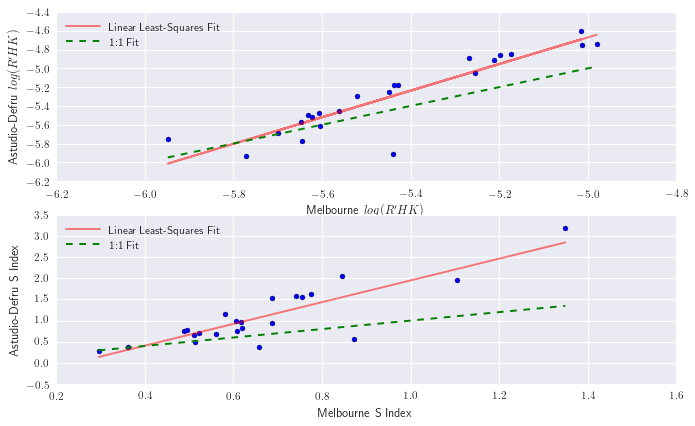

In [47]:
#fig, axs = plt.subplots(2,1, figsize=(10, 6), facecolor='w', edgecolor='k')

plt.figure(figsize=(10,6))

plt.subplot(211)
bool_ad_logRHK = np.logical_and(test["ad_logRHK"] != 0.0, test["rhk_prime"] != 0)
ad_logRHK = np.array(test["ad_logRHK"])

x = np.log10(test["rhk_prime"])[bool_ad_logRHK]
y = ad_logRHK[bool_ad_logRHK]
p = np.poly1d(np.polyfit(x, y, 1))
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
#plt.title("Comparison of R'HK index results")
plt.xlabel("Melbourne $log(R'HK)$")
plt.ylabel("Astudio-Defru $log(R'HK)$")

plt.subplot(212)
test = ascii.read("short_ALL_DATA.dat", fill_values=[('nan', 0.0)])
test = test[np.argsort(np.log10(test["s"]))][:33]
test = test[np.where(test["ad_S"]<11)]

bool_ad_S = np.logical_and(test["ad_S"] != 0.0, test["s"] != 0)
ad_S = np.array(test["ad_S"])

x = test["s"][bool_ad_S]
y = ad_S[bool_ad_S]
p = np.poly1d(np.polyfit(x, y, 1))
fit = p(x)
plt.scatter(x, y)
plt.plot(x, fit, "r", alpha=0.5, label="Linear Least-Squares Fit")
plt.plot(np.linspace(np.min(x),np.max(x)), np.linspace(np.min(x),np.max(x)), "g--", label="1:1 Fit")
plt.legend(loc="upper left")
#plt.errorbar(my_rhk, ad_rhk, yerr=ad_rkh_err, linestyle="None")
#plt.plot(np.linspace(-5,-6.2),np.linspace(-5,-6.2))
#plt.title("Comparison of S index results")
plt.xlabel("Melbourne S Index")
plt.ylabel("Astudio-Defru S Index")

plt.savefig("Comparisons/s_rhk_oneplot.png")
plt.show()